# Generalized Additive Model (TODO)

## imports

In [1]:
from pygam import LinearGAM, s
import numpy as np
import itertools
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from model_helper import load_and_format_data, test_and_eval, format_for_model, export_models

## constants

In [2]:
GARAGES = ["North Garage", "West Garage", "South Garage"]

# choose dates used in dataset name
DATE_START = "2025-02-13"
DATE_END = "2025-04-14"

## perform experiment on entire normalized dataset

### load data

In [3]:
# garage used as key with each one assigned a tuple representing the (x_data, y_data)
garage_data = {}

for garage in GARAGES:
    garage_data[garage] = load_and_format_data(garage, DATE_START, DATE_END)

### train model

In [4]:
# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_data[garage][1]))
    model = LinearGAM(s(0))
    model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = model

### inference plot and eval

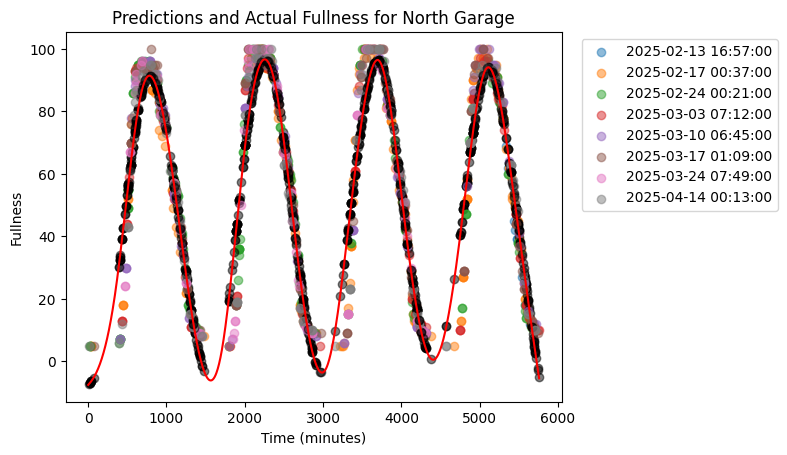

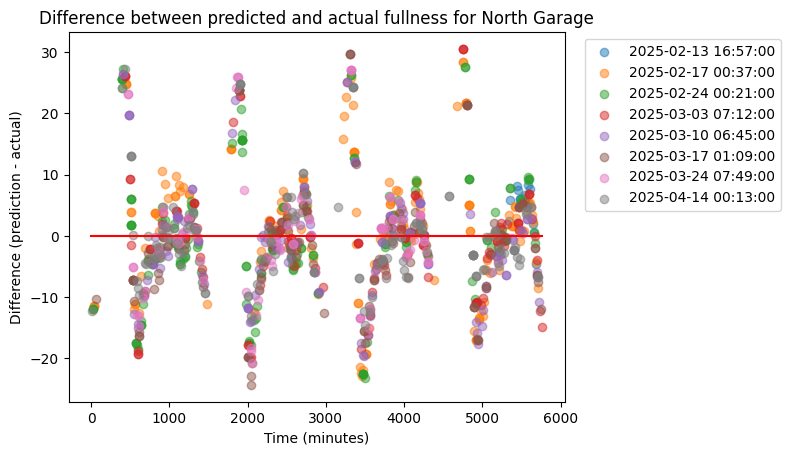

North Garage stats
r^2: 0.9099429185270752
rmse: 7.1028288814269365
mae: 10.02486543187646




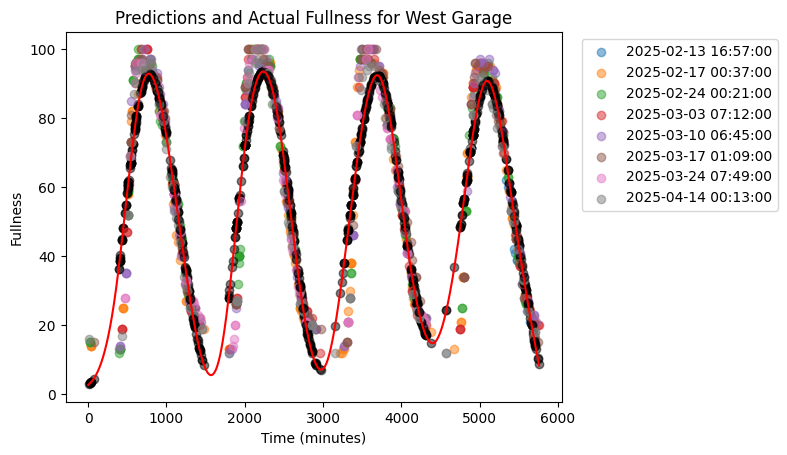

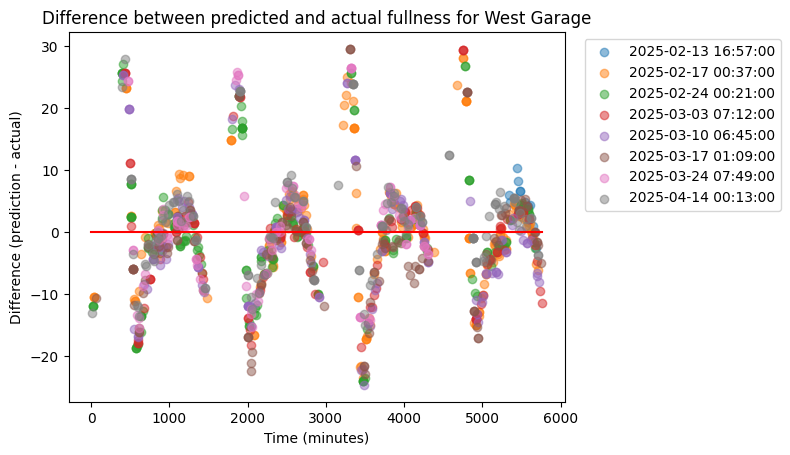

West Garage stats
r^2: 0.8850732507120529
rmse: 7.0049184016233745
mae: 9.927362473584887




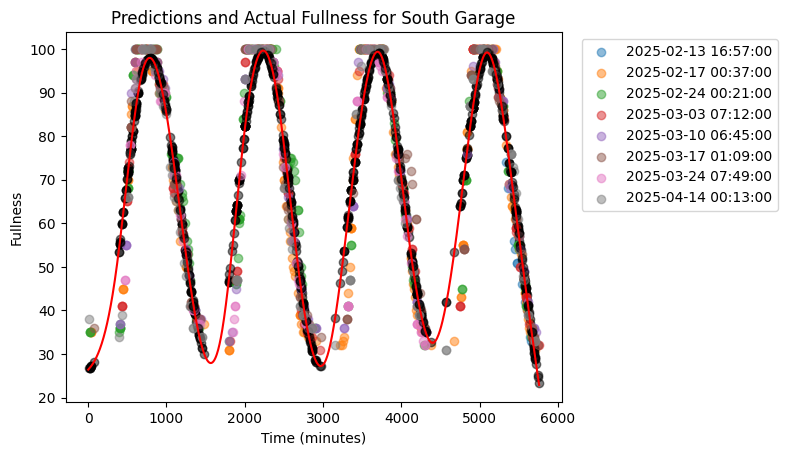

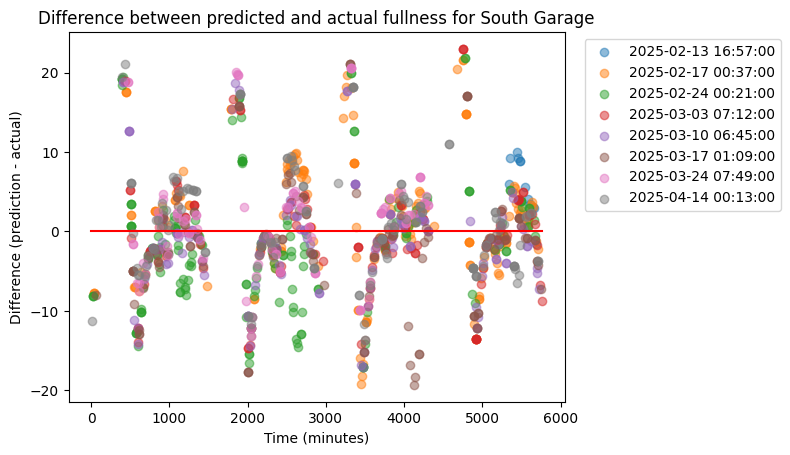

South Garage stats
r^2: 0.9006641485799696
rmse: 5.539366649169954
mae: 7.706576769455999




In [5]:
for garage in garage_models:
    formatted_x_data = [format_for_model(s.to_list()) for s in garage_data[garage][0]]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, garage_data[garage][1], garage_models[garage].predict)



## partitioned experiment

### load data

In [6]:
garage_training_data = {}

for garage in GARAGES:
    garage_training_data[garage] = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "training")

### train model

In [ ]:
# keys are each garage with value being params or list of weights made
garage_partition_models = {}
for garage in garage_training_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_training_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_training_data[garage][1]))
    model = LinearGAM(s(0))
    model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_partition_models[garage] = model

### inference, plot, and stats

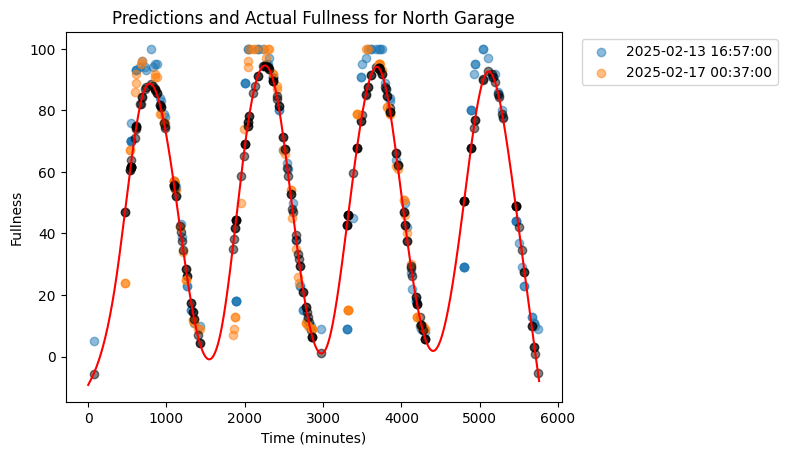

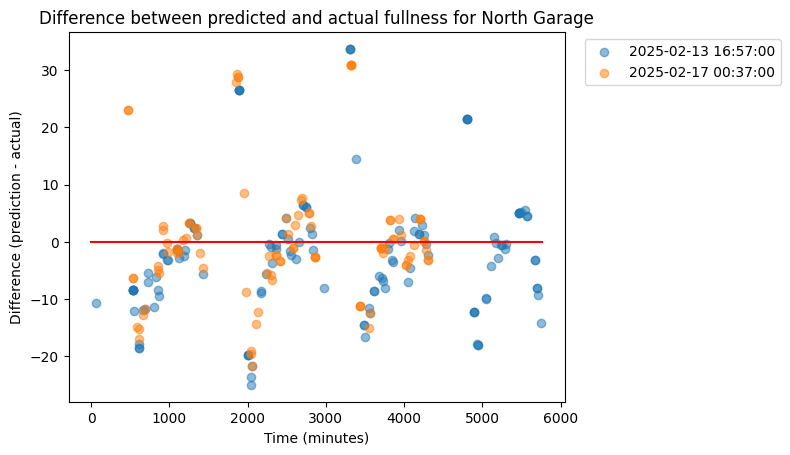

North Garage stats
r^2: 0.8876377744116256
rmse: 7.989518314747742
mae: 11.481400803805203




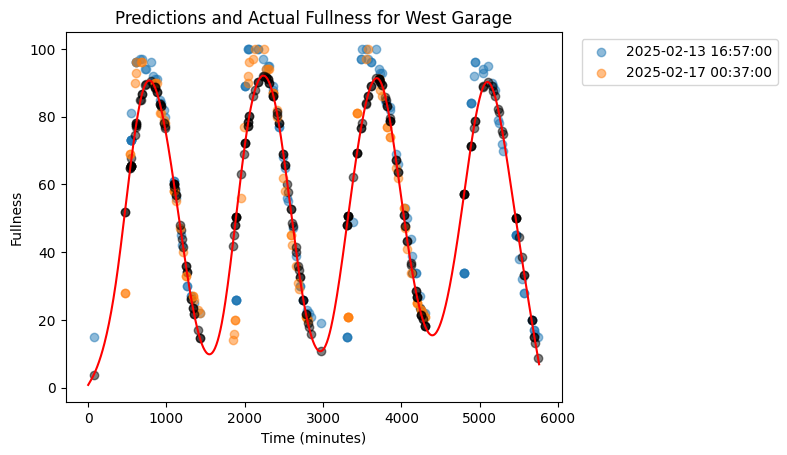

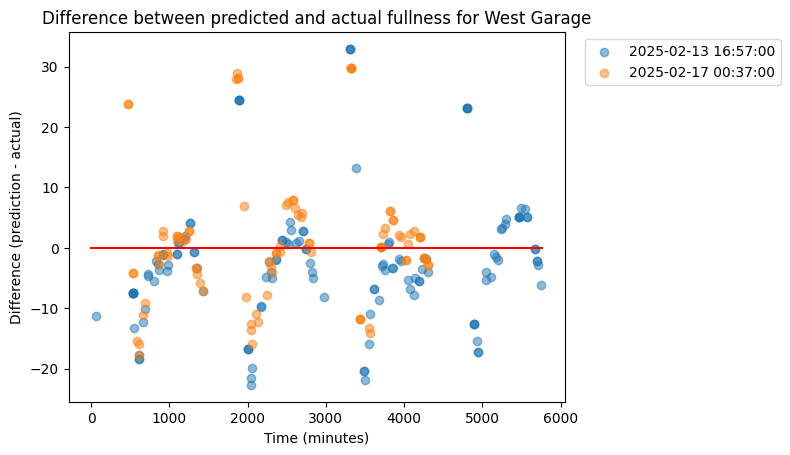

West Garage stats
r^2: 0.8580876605623835
rmse: 7.677402756290782
mae: 11.132068430736641




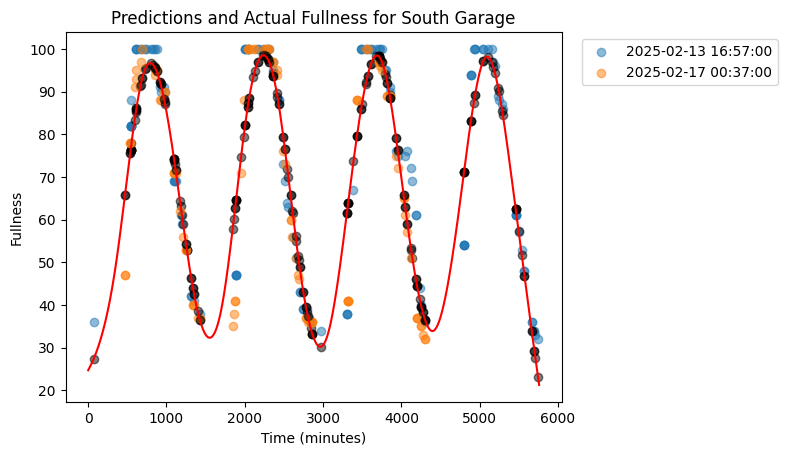

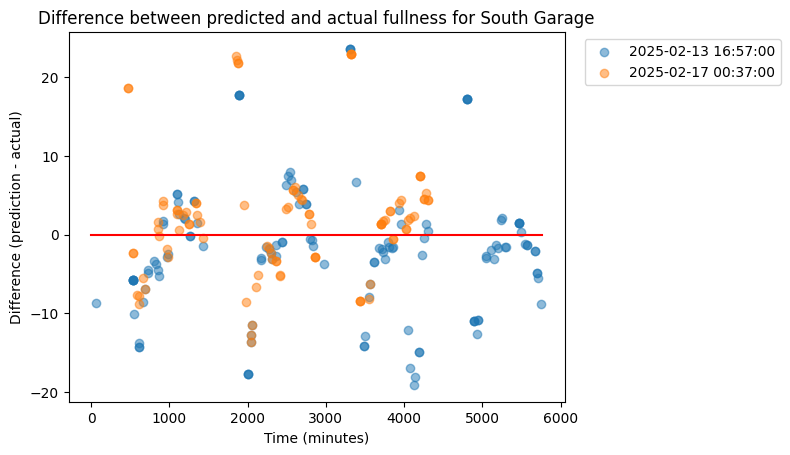

South Garage stats
r^2: 0.8755769779878532
rmse: 6.2743139262816126
mae: 8.71688267049891




In [8]:
for garage in garage_partition_models.keys():
    x_data, y_data, start_dates = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "test")
    formatted_x_data = [format_for_model(s.to_list()) for s in x_data]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, y_data, garage_partition_models[garage].predict)



## export models

In [9]:
export_models("gam", garage_models, garage_partition_models)

wrote fully trained models
wrote partition trained models
